# Install pytorch

## Create/switch to a new virtual env, to avoid messing with the default env.   
We use anaconda 'TF2' env

> jupyter notebook

In [1]:
!python --version

Python 3.7.13


In [2]:
!conda --version

conda 4.13.0


In [3]:
!conda list cudatoolkit

# packages in environment at C:\Users\eleve\anaconda3\envs\TF2:
#
# Name                    Version                   Build  Channel
cudatoolkit               11.3.1               h59b6b97_2    https://repo.anaconda.com/pkgs/main


In [4]:
!nvidia-smi

Thu Jun 16 12:03:52 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 472.12       Driver Version: 472.12       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A    0C    P8    12W /  N/A |    110MiB /  8192MiB |      2%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Go to https://pytorch.org/get-started/locally/ select installation config according to above.   

> conda install pytorch torchvision torchaudio cudatoolkit=11.3 -c pytorch

> conda install --file requirements.txt

In [5]:
import torch 

x = torch.rand(2, 3) 
print(x)

C:\Users\eleve\anaconda3\envs\TF2\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor([[0.4592, 0.7650, 0.0062],
        [0.6317, 0.5204, 0.0034]])


cmd, then cd to github\src\odn\torch_yolo, run (use pretrained model):

> python train.py --data data/coco128.yaml --cfg models/yolov5s.yaml --weights models/yolov5s.pt --batch-size 16

Using transfer learning, yolov5s can achieve about 0.9 mAP on coco128, 

         Epoch   gpu_mem       box       obj       cls    labels  img_size
         28/29     4.29G   0.03652   0.04224  0.008265       162       640: 100%|██████████| 8/8 [00:08<00:00,  1.12s/it]
                   Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]
                     all        128        929      0.887       0.84      0.907      0.666

         Epoch   gpu_mem       box       obj       cls    labels  img_size
         29/29     4.29G    0.0354    0.0472  0.007321       288       640: 100%|██████████| 8/8 [00:08<00:00,  1.10s/it]
                   Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]
                     all        128        929      0.891      0.842      0.909      0.674

    30 epochs completed in 0.102 hours.
    Optimizer stripped from runs\train\exp4\weights\last.pt, 14.9MB
    Optimizer stripped from runs\train\exp4\weights\best.pt, 14.9MB

<br/>

# mAP: Mean Average Precision (平均精确度)

如何衡量一个模型的性能，单纯用 precision 和 recall 都不科学。把 PR曲线下的面积 当做衡量尺度, 就有了 AP值 这一概念。这里的 average，等于是对 precision 进行 取平均 。AP 实为 PR_AUC。

# Make a new fundus image set as yolo's test set

In [10]:
import os
import shutil

def copy_images_to_one_folder(source, target):
	'''
	Copy all images (including subfolders) in the source folder to the target folder.
	'''
	os.makedirs(target, exist_ok=True)

	for root, dirs, files in os.walk(source):
		for file in files:
			if( not file.endswith('.db') and not file.endswith('.json') and 
               not '_FRCNN.' in file and not '_SSD.' in file):
				shutil.copy(os.path.join(root, file),os.path.join(target, file)) 

                
target = '../data/fundus/test'
source = 'C:/Users/eleve/Desktop/横向2022/TO 分区/注药'

copy_images_to_one_folder(source, target)

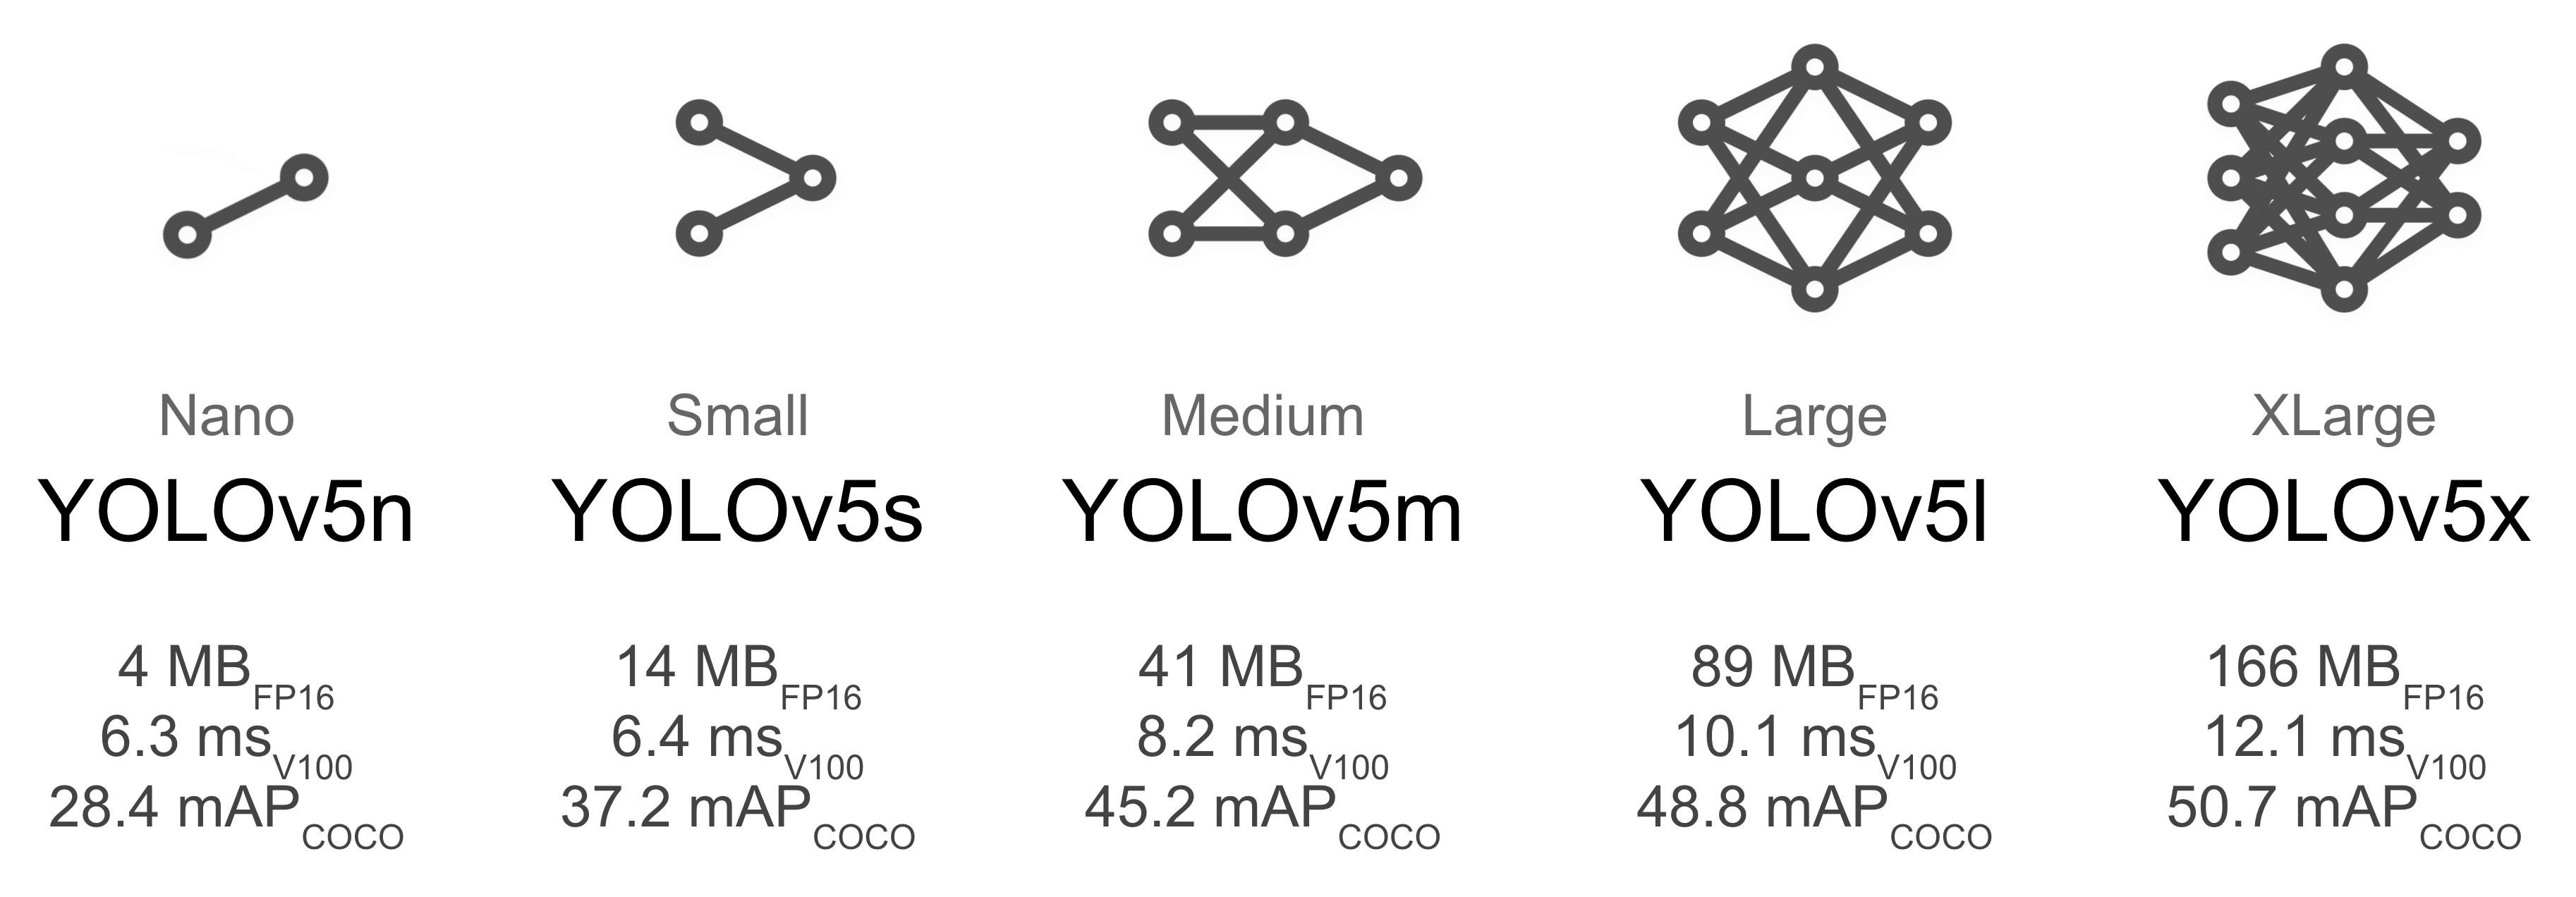

> cd C:\Users\eleve\Documents\codex\py\keras\8. Object Detection\github\src\odn\torch_yolo

> python train.py --data data/fundus.yaml --cfg models/yolov5m.yaml --weights models/yolov5m.pt --batch-size 8 --epochs 30